In [21]:
%load_ext autoreload
%autoreload 2

import mantis_core.utilities as manUtil
import mantis_wave_modelling.model_building as manMB
import mantis_wave_modelling.wave_modelling as manWM
import mantis_wave_modelling.wavelet as manWLET
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
current_wavelet = manWLET.wavelet(identifier="ricker", central_frequency=25)

rho = 2.55
cij = manUtil.VtoCij(Vp=3.5, Vs=1.7, Rho=rho)
rho2 = 2.6
cij2 = manUtil.VtoCij(Vp=5.0, Vs=2.8, Rho=rho2)
cij_array = np.array([cij, cij2,cij, cij2])
rho_array = np.array([rho, rho2,rho, rho2])
toplayer = manMB.IsotropicHalfspace.from_preset(preset="Water")
botlayer = manMB.IsotropicHalfspace.from_preset(preset="Soft-bottom")
reflection_zone = manMB.ReflectionZone(Cij_array=cij_array, Rho_array=rho_array)
model = manMB.EarthModel(
    top_halfspace=toplayer,
    bottom_halfspace=botlayer,
    reflection_zone=reflection_zone,
    depth_array=np.array([0.5, 0.1, 0.05, 0.1, 0.05 ,0.4]),
)
sg = manWM.ShotGather(
    earth_model=model,
    wavelet=current_wavelet,
    receiver_coordinates=np.array([0.0, 0.0, 0.0]),
    nSamples=2**11,
    dt=1 / 1000.0,
)
t1, t2 = sg.convolutional_avo(angle=0)
rr2 = np.array(
    [sg.wavefield(horizontal_slowness=[i, 0.001]) for i in np.linspace(0.0, 0.2, 40)]
)

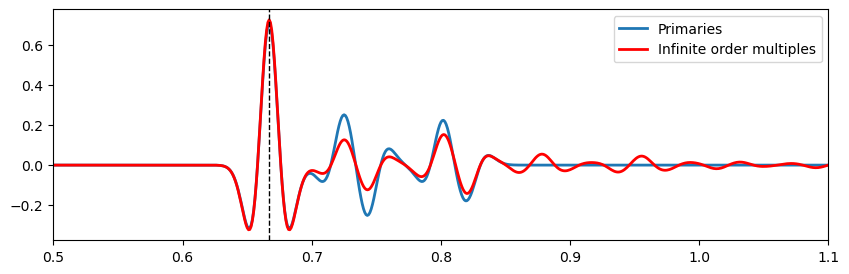

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.set_xlim(0.5, 1.1)
ax.plot(sg.time_axis, np.real(t2), linewidth=2)
ax.plot(sg.time_axis, 1 / 2 * np.real(rr2[0]), linewidth=2, color="r")
# ax.set_title("AVO response at 35 degrees")
ax.axvline(
    0.5 / np.sqrt(toplayer.Cij[0, 0] / toplayer.Rho) * 2,
    linewidth=1,
    color="k",
    linestyle="--",
)
ax.legend(["Primaries", "Infinite order multiples"])